<a href="https://colab.research.google.com/github/SarahJane86/food-sales-predictions/blob/main/Project1(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food Sales Predictions
### Project 1, part 5
#### Sarah Musselwhite
#### August 15, 2022

In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
set_config(display='diagram')

In [46]:
def eval_regression(true, pred):
  
  mae = mean_absolute_error(true, pred)
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(true, pred)

  print(f'MAE {mae},\n MSE {mse},\n RMSE: {rmse},\n R^2: {r2} ')

In [47]:
sales_df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR65MSt3WbS2eRLOz6LOKZM9QQed6ELSx80n7rVU0h39w3apF2-a58tMfa0b7zwZ5Uv67ZxBCJ57gvj/pub?gid=1310383789&single=true&output=csv')
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### Before splitting your data, you can drop duplicates and fix inconsistencies in categorical data.* (*There is a way to do this after the split, but for this project, you may perform this step before the split)

In [48]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [49]:
sales_df.duplicated().any() 
#No Duplicates found

False

In [50]:
sales_df.dropna(inplace=True) 
#Dropping missing data

#### Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.  

In [51]:
x = sales_df.drop('Item_Outlet_Sales', axis=1)
y = sales_df['Item_Outlet_Sales']
#Identifying X features and Y target 

In [52]:
x.head()
#verifying that previous code worked

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2


#### Perform a train test split 

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
x_train.head()
#perform a train test split

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1909,FDA38,5.440,Low Fat,0.025520,Dairy,238.7538,OUT049,1999,Medium,Tier 1,Supermarket Type1
3715,FDO57,20.750,Low Fat,0.108879,Snack Foods,161.5578,OUT049,1999,Medium,Tier 1,Supermarket Type1
3371,FDT14,10.695,Regular,0.128247,Dairy,121.8440,OUT018,2009,Medium,Tier 3,Supermarket Type2
6743,DRF51,15.750,Low Fat,0.166514,Dairy,38.0506,OUT018,2009,Medium,Tier 3,Supermarket Type2
5207,FDC16,11.500,Regular,0.000000,Dairy,88.2540,OUT046,1997,Small,Tier 1,Supermarket Type1


In [54]:
len(x_train)
#verifying 70/30 split

3487

In [55]:
len(x_test)
#verifying 70/30 split

1163

#### Create a preprocessing object to prepare the dataset for Machine Learning

In [56]:
object_select = make_column_selector(dtype_include='object')
integer_select = make_column_selector(dtype_include='number')

In [57]:
scaler = StandardScaler()
OHE = OneHotEncoder(handle_unknown='ignore', sparse= False)

In [58]:
int_tup =(scaler, integer_select)
obj_tup =(OHE, object_select)

In [59]:
tform_col = make_column_transformer (int_tup, obj_tup, remainder = 'passthrough')

#### Make sure your imputation of missing values occurs  after the train test split using SimpleImputer.  

In [60]:
mean_impute = SimpleImputer(strategy='mean')
most_freq_impute = SimpleImputer(strategy='most_frequent')

In [61]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4650 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            4650 non-null   object 
 1   Item_Weight                4650 non-null   float64
 2   Item_Fat_Content           4650 non-null   object 
 3   Item_Visibility            4650 non-null   float64
 4   Item_Type                  4650 non-null   object 
 5   Item_MRP                   4650 non-null   float64
 6   Outlet_Identifier          4650 non-null   object 
 7   Outlet_Establishment_Year  4650 non-null   int64  
 8   Outlet_Size                4650 non-null   object 
 9   Outlet_Location_Type       4650 non-null   object 
 10  Outlet_Type                4650 non-null   object 
 11  Item_Outlet_Sales          4650 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 472.3+ KB


### Project 1, Final
#### Sarah Musselwhite
#### August 23, 2022

In [62]:
num_pipe = make_pipeline(mean_impute, scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [63]:
cat_pipe = make_pipeline(most_freq_impute, OHE)
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [64]:
num_tuple = (num_pipe, integer_select)
cat_tuple = (cat_pipe, object_select)
preprocess = make_column_transformer(num_tuple, cat_tuple,remainder= 'passthrough')
preprocess

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a565fe690>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a565fe410>)])

In [65]:
preprocess.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a565fe690>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a565fe410>)])

In [66]:
train_x_process = preprocess.transform(x_train)
test_x_process = preprocess.transform(x_test)

In [67]:
# Inspecting
print(np.isnan(train_x_process).sum().sum(), 'missing values in training data')
print(np.isnan(test_x_process).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in train_x_processed are', train_x_process.dtype)
print('All data in test_x_processed are', test_x_process.dtype)
print('\n')
print('Shape of data is', train_x_process.shape)
print('\n')
train_x_process

0 missing values in training data
0 missing values in testing data


All data in train_x_processed are float64
All data in test_x_processed are float64


Shape of data is (3487, 1522)




array([[-1.61873556, -0.80142192,  1.55615978, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.6567808 ,  1.06509895,  0.31746464, ...,  0.        ,
         1.        ,  0.        ],
       [-0.49444827,  1.49877652, -0.31978717, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.28752511,  0.43911456, -0.98967997, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.21264393, -0.69794226,  1.19135799, ...,  0.        ,
         1.        ,  0.        ],
       [-0.08688075, -0.28145496, -1.30541276, ...,  1.        ,
         1.        ,  0.        ]])

#### 1) Your first task is to build a linear regression model to predict sales.

- Build a linear regression model.
- Evaluate the performance of your model based on r^2.
- Evaluate the performance of your model based on rmse.

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
scaler = StandardScaler()
reg = LinearRegression()

In [70]:
regress_pipe = make_pipeline(preprocess, reg)

In [71]:
# Train the model with Training data
regress_pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a565fe690>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a565fe410>)])),
                ('linearregression', LinearRegression())])

In [72]:
# Creating Model Predictions
train_predict = regress_pipe.predict(x_train)
test_predict = regress_pipe.predict(x_test)

In [73]:
# Calculating RMSE
train_rmse = np.mean(np.abs(train_predict - y_train)**2)
test_rmse = np.mean(np.abs(test_predict - y_test)**2)

print(f'Model Training RMSE: {train_rmse}')
print(f'Model Testing RMSE: {test_rmse}')

Model Training RMSE: 687880.3312144497
Model Testing RMSE: 9.176748028211976e+26


In [74]:
# Calculating R2
r2_train = np.corrcoef(y_train,train_predict)[0][1]**2
r2_test = np.corrcoef(y_test, test_predict)[0][1]**2

print(f'Model Training R2: {r2_train}')
print(f'Model Testing R2: {r2_test}')

Model Training R2: 0.6945034081332715
Model Testing R2: 0.0005318972276912753


#### 2) Your second task is to build a regression tree model to predict sales.

- Build a simple regression tree model.
- Compare the performance of your model based on r^2.
- Compare the performance of your model based on rmse.  

In [75]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [76]:
decider_tree = DecisionTreeRegressor(random_state = 42)

In [77]:
decider_tree_pipe = make_pipeline(preprocess, decider_tree)

In [78]:
decider_tree_pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a565fe690>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a565fe410>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [79]:
# Prediction
predict_train = decider_tree_pipe.predict(x_train)
predict_test = decider_tree_pipe.predict(x_test)

In [80]:
# Evaluating the model
scored_train = decider_tree_pipe.score(x_train, y_train)
scored_test = decider_tree_pipe.score(x_test, y_test)
print(scored_train)
print(scored_test)

1.0
-0.03943559720625278


In [81]:
# Tuning the model
decider_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [82]:
# Depth of tree
decider_tree.get_depth()

74

In [83]:
# Leaf Nodes
decider_tree.get_n_leaves()

3448

In [91]:
#List values to try for max_depth
depths = list(range(2,60))
#Data frame to store the score for each value of max_depth
scores = pd.DataFrame(index = depths, columns=['Test Score','Train Score'])
for depth in depths:
  decider_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
  decider_tree.fit(train_x_process ,y_train)
  train_score = decider_tree.score(train_x_process, y_train)
  test_score = decider_tree.score(test_x_process, y_test)
  scores.loc[depth, 'Train Score']= train_score
  scores.loc[depth, 'Test Score']= test_score

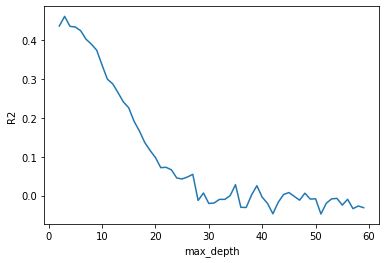

In [85]:
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');

In [86]:
sort_scores = scores.sort_values(by ='Test Score', ascending =False)
sort_scores.head()

,Test Score,Train Score
3,0.461687,0.457636
2,0.436659,0.432229
4,0.435923,0.471689
5,0.43428,0.486167
6,0.424701,0.50388


In [87]:
eval_regression(y_train, train_predict)

MAE 588.6561938629194,
 MSE 687880.3312144497,
 RMSE: 829.3855142299326,
 R^2: 0.694376711321778 


In [88]:
eval_regression(y_test, test_predict)

MAE 5344616016292.147,
 MSE 9.176748028211976e+26,
 RMSE: 30293147786606.754,
 R^2: -4.131268231491944e+20 


3) You now have tried 2 different models on your data set. You need to determine which model to implement.

- Overall, which model do you recommend?
- Justify your recommendation.

###### Answer: I chose Linear Regression, due to the fact that our R2 values are in the negative on the regression Tree. Linear seemed much more accurate. The decision tree model, the variance of the values in both train and test were all over the place.